In [143]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify   

In [144]:
pokemon_df = pd.read_csv('assets\pokemon.csv')
pokemon_df.head (10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


Finding out what the weakest and strongest pokemon are.

In [145]:
cols = ['against_bug', 'against_dark', 'against_dragon','against_electric', 'against_fairy', 'against_fight', 'against_fire','against_flying', 'against_ghost', 'against_grass', 'against_ground','against_ice', 'against_normal', 'against_poison', 'against_psychic','against_rock', 'against_steel', 'against_water', 'attack','sp_attack']
pokemon_df['Total Strength'] = pokemon_df[cols].sum(axis=1)

In [146]:
strong = pokemon_df.sort_values(['Total Strength'],ascending=False)
print ('Strongest Pokemon')
strong['name'][0]


Strongest Pokemon


'Bulbasaur'

In [147]:
print('Weakest pokemon')
strong['name'][800]

Weakest pokemon


'Magearna'

Droping some columns to make the data easier to work with to visuals 

In [148]:
columns_to_drop= ['abilities','base_egg_steps','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight','against_fire','against_flying','against_ghost'
,'against_grass','against_ground','against_ice','against_normal','against_poison','against_psychic','against_rock','against_steel','against_water','classfication']
pokemon_df.drop(columns_to_drop, axis= 1 , inplace= True)
pokemon_df.head(10)

,attack,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,japanese_name,name,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Total Strength
0,49,70,318,45,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,...,1,65,65,45,grass,poison,6.9,1,0,133.25
1,62,70,405,45,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,...,2,80,80,60,grass,poison,13.0,1,0,161.25
2,100,70,625,45,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,...,3,122,120,80,grass,poison,100.0,1,0,241.25
3,52,70,309,45,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,...,4,60,50,65,fire,NaN,8.5,1,0,130.00
4,64,70,405,45,58,1059860,1.1,58,Lizardoリザード,Charmeleon,...,5,80,65,80,fire,NaN,19.0,1,0,162.00
5,104,70,634,45,78,1059860,1.7,78,Lizardonリザードン,Charizard,...,6,159,115,100,fire,flying,90.5,1,0,281.50
6,48,70,314,45,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,...,7,50,64,43,water,NaN,9.0,1,0,116.00
7,63,70,405,45,80,1059860,1.0,59,Kameilカメール,Wartortle,...,8,65,80,58,water,NaN,22.5,1,0,146.00
8,103,70,630,45,120,1059860,1.6,79,Kamexカメックス,Blastoise,...,9,135,115,78,water,NaN,85.5,1,0,256.00
9,30,70,195,255,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,...,10,20,20,45,bug,NaN,2.9,1,0,69.50


anlyazing the data more in depth 

In [149]:
pokemon_df.describe()

,attack,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,Total Strength
count,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000,801.000000
mean,77.857678,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391,168.207553
std,32.158820,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583,53.380056
min,5.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000,38.000000
25%,55.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000,129.000000
50%,75.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000,164.250000
75%,100.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000,199.500000
max,185.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000,380.250000


In [150]:
pokemon_df.shape 

(801, 21)

In [151]:
pokemon_df.nunique()


attack               114
base_happiness         6
base_total           203
capture_rate          34
defense              109
experience_growth      6
height_m              51
hp                    99
japanese_name        801
name                 801
percentage_male        7
pokedex_number       801
sp_attack            111
sp_defense            97
speed                113
type1                 18
type2                 18
weight_kg            421
generation             7
is_legendary           2
Total Strength       397
dtype: int64

Next is a graph showing how many pokemon were added with the release of each generation 

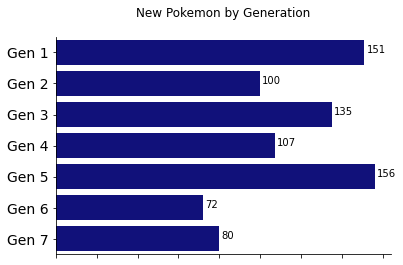

In [152]:
generations = [f'Gen {g}' for g in pokemon_df.generation.unique()]

ax = sns.countplot(y=pokemon_df.generation, orient='h', color='darkblue')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])
ax.set_ylabel(ylabel='')
ax.set_yticklabels(generations, size=14)
ax.set_facecolor('white')
ax.set_title('New Pokemon by Generation', loc='center', pad=20)

sns.despine( right=True)

for index, value in enumerate(pokemon_df.generation.value_counts().sort_index()): 
    plt.annotate(f'{value}', xy=(value + 1, index), color='black') 

visualzing the types of pokemon with charts both primary and secondary types 

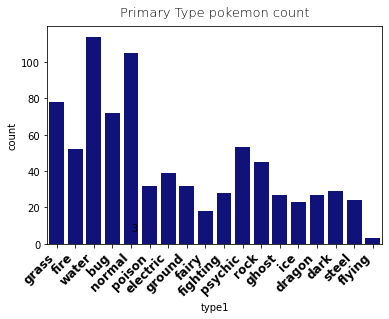

In [153]:

type = ['type (t)' for t in pokemon_df.type1.unique()]
ax = sns.countplot(x=pokemon_df.type1 , color='darkblue')
ax.set_title('Primary Type pokemon count', loc='center', pad=10, weight= 10 , fontsize=13  )

plt.xticks(
     rotation=45, 
    horizontalalignment='right',
    fontweight='heavy',
    fontsize='large'
)
for index, value in enumerate(pokemon_df.type1.value_counts().sort_index()): 
    plt.annotate(f'{value}', xy=(value + 1, index), color='black') 

Text(0.5, 1.0, 'Secondary type pokemon count')

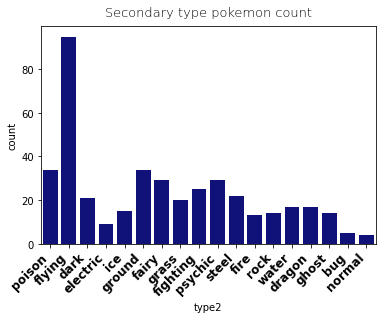

In [154]:
type2 = [f'type (t)' for t in pokemon_df.type2.unique()]
ax = sns.countplot(x=pokemon_df.type2 , color='darkblue')

plt.xticks(
     rotation=45, 
    horizontalalignment='right',
    fontweight='heavy',
    fontsize='large'
)
ax.set_title('Secondary type pokemon count', loc='center', pad=10, weight= 15 , fontsize=13  )



In [155]:
type1_value_counts = pokemon_df['type1'].value_counts()

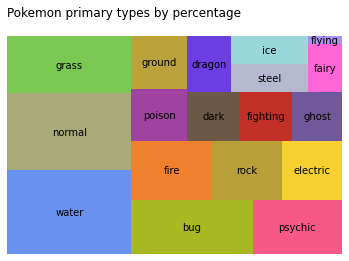

In [156]:
palette = ['#6991F0', '#A8AA79', '#7AC852', '#A7B822', '#F85887', '#EF812E', '#B99F38', '#F6D030', '#A0429F', 
           '#BCA23B', '#6D5947', '#C12F27', '#70589A', '#6B3EE3', '#B6B8D0', '#9AD7D9', '#FF65D5', '#A991F0']
ax = squarify.plot(type1_value_counts, 
              label=type1_value_counts.index,
              color=palette,
              pad=0,
              text_kwargs={'fontsize': 10 , 'color': 'black'})
ax.set_title('Pokemon primary types by percentage ', loc='left', pad=20)
ax.figure
plt.axis('off');